In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import scipy.io

In [5]:
import matplotlib

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.decomposition import PCA

In [9]:
import sklearn.decomposition as skdc

In [10]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
import seaborn as sns

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Taken from: https://www.kaggle.com/stevebroll/logistic-regression-model-using-pca-components
def standardization(x): #Define function to standardize the data, since all variables are not in the same units
    xmean = np.mean(x) ##calculate mean
    sd = np.std(x) ##calculate standard deviation 
    x_z = (x - xmean) / sd ##calculate standardized value to return
    return(x_z)

In [15]:
# Step 1: Load in the most recent year of data into a data frame.
#df = pd.read_csv("2015_data.csv", low_memory = False)
df = pd.read_csv("2015_data.csv", nrows = 20000, low_memory = False)

In [16]:
#df.head(100)

In [17]:
# Analyze the data to determine what can be cleaned, to understand the types of values/inputs. 
for col in df:
    print(col)
    print(df[col].unique())

resident_status
[1 3 2 4]
education_1989_revision
[nan 12. 16.  6. 17.  8. 14. 10.  7. 15.  9. 11.  5. 13.  0.  3. 99.  1.
  4.  2.]
education_2003_revision
[ 3.  6.  5.  4.  9.  2.  1.  8.  7. nan]
education_reporting_flag
[1 0]
month_of_death
[ 1  2  3  4  5  6  7  8  9 10 11 12]
sex
['M' 'F']
detail_age_type
[1 4 2 5 6]
detail_age
[ 84  70  91  40  89  78  92  82  93  67  94  56  32  18  48  79  85  61
  72  86  98  66  62  60  43  90  76  65  80  51  71  95  49  99  64  68
  58  74  57  77  25  39  69  59  50  53  87  81  97 100  75  88  83  20
  24  73  19  54  63  26  13  52  46  30  33  23  45  41  44  42 104   7
   2  55   5   3  35  37  47  34  28  31  96  36   1  27  38  29  12   4
  22  21   6  11 101  14 107  16   8  15 102   9  17  10 103 106 109 105
 110]
age_substitution_flag
[nan]
age_recode_52
[42 40 44 34 43 41 39 37 32 29 35 38 45 36 31 33 46 30  9 18 11 13 16 14
  2 24 27 15  7 28 25  3 22 12  1 23 26  4 47 10  6 17  8  5 19 48]
age_recode_27
[22 20 24 14 23 21 19 1

In [18]:
# Get number of data records and features.
df.shape

(20000, 77)

In [19]:
# Determine how many fields with actual data (not NA fields).
#df.count()

In [20]:
'''
Lots of missing data:

- education_1989_revision - lots without data
- age_substitution_flag - Lots without data
- infant_age_recode_22 - lots without data
- activity_code - many without data
- place_of_injury_for_causes_w00_y34_except_y06_and_y07_ - many without data
- 130_infant_cause_recode - many without data
- remove entity_condition_19-entity_condition_20
- remove record_condition_3-20
- bridged_race_flag, race_imputation_flag can be removed 

'''

'''
A few nan values:
- manner_of_death
- education_2003_revision
'''

cols_to_remove = ["education_1989_revision", "age_substitution_flag", "infant_age_recode_22", "activity_code", "place_of_injury_for_causes_w00_y34_except_y06_and_y07_", "130_infant_cause_recode", "entity_condition_19", "entity_condition_20", "record_condition_3", "record_condition_4", "record_condition_5", "record_condition_6", "record_condition_7", "record_condition_8", "record_condition_9", "record_condition_10", "record_condition_11", "record_condition_12", "record_condition_13", "record_condition_14", "record_condition_15", "record_condition_16", "record_condition_17", "record_condition_18", "record_condition_19", "record_condition_20", "bridged_race_flag", "race_imputation_flag"]

# Remove the fields that don't contribute enough data (nan fields).
cols_to_keep = []
for col in df:
    if col not in cols_to_remove:
        cols_to_keep.append(col)
        
print(cols_to_keep)        


['resident_status', 'education_2003_revision', 'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type', 'detail_age', 'age_recode_52', 'age_recode_27', 'age_recode_12', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'current_data_year', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 'autopsy', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '39_cause_recode', 'number_of_entity_axis_conditions', 'entity_condition_1', 'entity_condition_2', 'entity_condition_3', 'entity_condition_4', 'entity_condition_5', 'entity_condition_6', 'entity_condition_7', 'entity_condition_8', 'entity_condition_9', 'entity_condition_10', 'entity_condition_11', 'entity_condition_12', 'entity_condition_13', 'entity_condition_14', 'entity_condition_15', 'entity_condition_16', 'entity_condition_17', 'entity_condition_18', 'number_of_record_axis_conditions', 'record_condition_1', 'record_condition_2', 'race', 'race_recode_3', 'race_reco

In [21]:
# Create the new data frame with only the features we care about/have enough data.
df = df[cols_to_keep]

In [22]:
df.shape

(20000, 49)

In [23]:
#df.count()

In [24]:
'''
Need to weed out features:
- entity_condition_3-18
'''
cols_to_remove = ["entity_condition_3", "entity_condition_4", "entity_condition_5", "entity_condition_6", "entity_condition_7", "entity_condition_8", "entity_condition_9", "entity_condition_10", "entity_condition_11", "entity_condition_12", "entity_condition_13", "entity_condition_14", "entity_condition_15", "entity_condition_16", "entity_condition_17", "entity_condition_18"]

# Remove the fields that don't contribute enough data (nan fields).
cols_to_keep = []
for col in df:
    if col not in cols_to_remove:
        cols_to_keep.append(col)
        
print(cols_to_keep)        


['resident_status', 'education_2003_revision', 'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type', 'detail_age', 'age_recode_52', 'age_recode_27', 'age_recode_12', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'current_data_year', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 'autopsy', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '39_cause_recode', 'number_of_entity_axis_conditions', 'entity_condition_1', 'entity_condition_2', 'number_of_record_axis_conditions', 'record_condition_1', 'record_condition_2', 'race', 'race_recode_3', 'race_recode_5', 'hispanic_origin', 'hispanic_originrace_recode']


In [25]:
# Update the data frame.
df = df[cols_to_keep]

In [26]:
df.shape

(20000, 33)

In [27]:
#df.count()

In [28]:
# Since classification problem is tied to manner of death, do not want to include any rows without this information.
#df = df[pd.notnull(df['manner_of_death'])]

In [29]:
df.shape

(20000, 33)

In [30]:
# See how this manipulation of the number of records has affected counts. More to weed out?
#df.count()

In [31]:
'''
Weed out entity_condition_2, record_condition_2
'''

cols_to_remove = ["entity_condition_2", "record_condition_2"]

# Remove the fields that don't contribute enough data (nan fields).
cols_to_keep = []
for col in df:
    if col not in cols_to_remove:
        cols_to_keep.append(col)

In [32]:
df = df[cols_to_keep]
df.shape

(20000, 31)

In [33]:
#df.count()

# Now see that the only field field with nan value is: education_2003_revision.

In [34]:
# Since education_2003_revision only has values 1-9, we can change the nan fields to contain 0's instead.
df["education_2003_revision"].fillna(0, inplace=True)
df['manner_of_death'].fillna(0, inplace=True)

Text(0.5,1,'Correlation between different features')

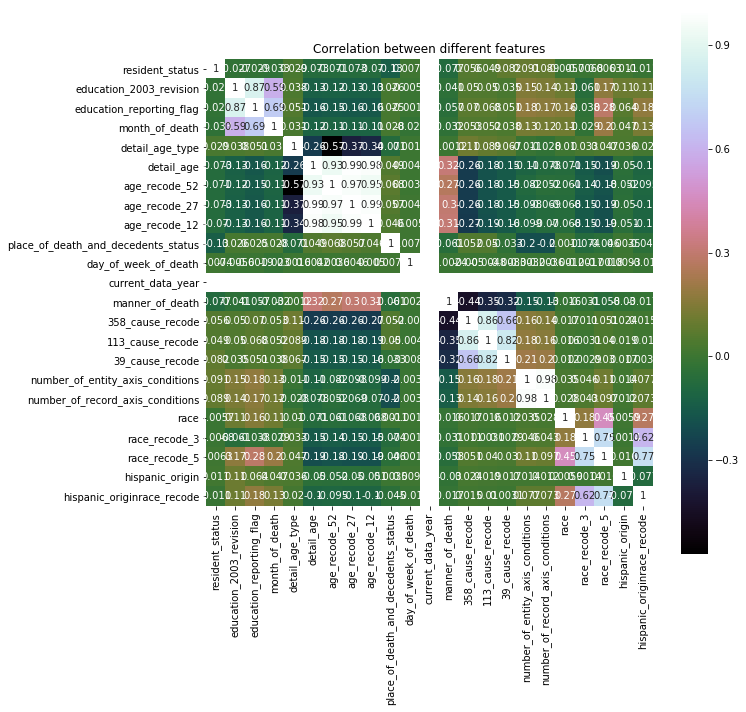

In [35]:
# Compute pairwise correlation of all features.
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title("Correlation between different features")

In [36]:
# We can drop the highly coorelated values. (> .7)
df = df.drop(['education_reporting_flag'], axis = 1)
df = df.drop(['age_recode_12'], axis = 1)
df = df.drop(['age_recode_27'], axis = 1)
df = df.drop(['age_recode_52'], axis = 1)
df = df.drop(['39_cause_recode'], axis = 1)
df = df.drop(['358_cause_recode'], axis = 1)
df = df.drop(['race_recode_5'], axis = 1)

In [37]:
# In order to use PCA, data cannot contain string (needs numerical data).
# Solution: Use LabelEncoder on data that is ordinal. Use OneHotEncoder on data that is NOT ordinal.
# The following fields are non-numerical: sex, autopsy, marital_status, injury_at_work, method_of_disposition, icd_code_10th_revision,
#                                         entity_condition_1, record_condition_1
# Since non of these are ordinal, we will one hot encode all of them
cols_to_one_hot_encode = ["autopsy", "method_of_disposition", "sex","marital_status", "injury_at_work", "icd_code_10th_revision", "entity_condition_1", "record_condition_1"]

for col in cols_to_one_hot_encode:
    print(col)
    df[col] = pd.Categorical(df[col])
    df_dummies = pd.get_dummies(df[col], prefix = col)
    df = pd.concat([df, df_dummies], axis = 1)
    df = df.drop([col], axis = 1)
df.info()

autopsy
method_of_disposition
sex
marital_status
injury_at_work
icd_code_10th_revision
entity_condition_1
record_condition_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 2786 entries, resident_status to record_condition_1_Y871
dtypes: float64(2), int64(14), uint8(2770)
memory usage: 55.3 MB


In [38]:
'''
Feature engineering
Want to use one-hot encoding on non-linear features because don't want to imply a relationship that isn't there is there.

99 - not stated education_1989_revision (replace all 99's with nan, replace nan's with avg)
9 - unknown education_2003_revision
education_reporting_flag - tells which of above items on certificate of death
need all the age_recodes? Or just pick one?
Just pick one of these or chop the one's with it unknown?
Use PCA first, then check correlations. Then can decide what to drop.


age_substitution_flag - calculated age substitutions


place of death - first 3 are same?, where is 8?, 9-unknown - one hot encode, look at PCA output


current_data_year - not relevant (all 2015) but will be when mix in other datasets

manner of death - one hot encode

method_of_disp - one hot

icd_code_10th_revision - unsure what it is, may use in PCA but might scrap later

hot encode cause_recodes (scrap 2, keep 1?) - PCA 

number_of_entity_axis_conditions, entity_condition_1, number_of_record_axis_conditions?, record_condition_1?


race - hot encode

race_recodes - PCA 

hispanic_origin - hot encode (scrap hispanic_originrace_recode)

'''

"\nFeature engineering\nWant to use one-hot encoding on non-linear features because don't want to imply a relationship that isn't there is there.\n\n99 - not stated education_1989_revision (replace all 99's with nan, replace nan's with avg)\n9 - unknown education_2003_revision\neducation_reporting_flag - tells which of above items on certificate of death\nneed all the age_recodes? Or just pick one?\nJust pick one of these or chop the one's with it unknown?\nUse PCA first, then check correlations. Then can decide what to drop.\n\n\nage_substitution_flag - calculated age substitutions\n\n\nplace of death - first 3 are same?, where is 8?, 9-unknown - one hot encode, look at PCA output\n\n\ncurrent_data_year - not relevant (all 2015) but will be when mix in other datasets\n\nmanner of death - one hot encode\n\nmethod_of_disp - one hot\n\nicd_code_10th_revision - unsure what it is, may use in PCA but might scrap later\n\nhot encode cause_recodes (scrap 2, keep 1?) - PCA \n\nnumber_of_entity

In [39]:
#pca.explained_variance_ratio_

In [40]:
df.describe()

,resident_status,education_2003_revision,month_of_death,detail_age_type,detail_age,place_of_death_and_decedents_status,day_of_week_of_death,current_data_year,manner_of_death,113_cause_recode,...,record_condition_1_Y831,record_condition_1_Y832,record_condition_1_Y833,record_condition_1_Y835,record_condition_1_Y836,record_condition_1_Y839,record_condition_1_Y848,record_condition_1_Y850,record_condition_1_Y86,record_condition_1_Y871
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.0,20000.00000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000
mean,1.208800,0.769200,3.150600,1.01845,70.905950,3.360300,4.007800,2015.0,6.28270,70.554850,...,0.000050,0.000050,0.000050,0.000050,0.000050,0.000300,0.0001,0.000150,0.000350,0.000050
std,0.466598,1.715482,2.517645,0.24065,18.249897,2.048168,2.009438,0.0,1.95112,31.509063,...,0.007071,0.007071,0.007071,0.007071,0.007071,0.017318,0.0100,0.012247,0.018705,0.007071
min,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2015.0,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.00000,61.000000,1.000000,2.000000,2015.0,7.00000,46.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.00000,74.000000,4.000000,4.000000,2015.0,7.00000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,4.000000,1.00000,85.000000,4.000000,6.000000,2015.0,7.00000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
max,4.000000,9.000000,12.000000,6.00000,110.000000,9.000000,7.000000,2015.0,7.00000,135.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000


In [41]:
for col in df:
    print(col)


resident_status
education_2003_revision
month_of_death
detail_age_type
detail_age
place_of_death_and_decedents_status
day_of_week_of_death
current_data_year
manner_of_death
113_cause_recode
number_of_entity_axis_conditions
number_of_record_axis_conditions
race
race_recode_3
hispanic_origin
hispanic_originrace_recode
autopsy_N
autopsy_U
autopsy_Y
method_of_disposition_B
method_of_disposition_C
method_of_disposition_D
method_of_disposition_O
method_of_disposition_R
method_of_disposition_U
sex_F
sex_M
marital_status_D
marital_status_M
marital_status_S
marital_status_U
marital_status_W
injury_at_work_N
injury_at_work_U
injury_at_work_Y
icd_code_10th_revision_A021
icd_code_10th_revision_A047
icd_code_10th_revision_A048
icd_code_10th_revision_A090
icd_code_10th_revision_A099
icd_code_10th_revision_A162
icd_code_10th_revision_A169
icd_code_10th_revision_A199
icd_code_10th_revision_A310
icd_code_10th_revision_A319
icd_code_10th_revision_A400
icd_code_10th_revision_A401
icd_code_10th_revision_A

In [42]:
# Taken from: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

# Separate out the target (sex) for classification.
# Hack because 2 values for both sex_M and sex_F so both sets of data present the sex with the encoding. Can just pick 1.
y = df.loc[:, ['manner_of_death']].values

df = df.drop(['manner_of_death'], axis = 1)

# Separate out the features.
features =  list(df.columns.values)
x = df.loc[:, features].values

# test_size: what proportion of original data is used for test set
train, test, train_label, test_label = train_test_split( x, y, test_size=1/7.0, random_state=0)

scaler = StandardScaler()
# Fit on training set only.

scaler.fit(train)
# Apply transform to both the training set and the test set.
train = scaler.transform(train)
test = scaler.transform(test)

In [43]:
# Make an instance of the Model
pca = PCA(.95)

In [44]:
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
train = pca.transform(train)
test = pca.transform(test)

In [46]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [47]:
#logisticRegr.score(test, test_label)

In [48]:
'''# Standardize the data before performing PCA. Needs to be on unit scale for optimal performance of algorithms.
# Separate out the features.
features =  list(df.columns.values)
x = df.loc[:, features].values

# Separate out the target (sex) for classification.
# Hack because 2 values for both sex_M and sex_F so both sets of data present the sex with the encoding. Can just pick 1.
y = df.loc[:, ['sex_M']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 2)

principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

result_df = pd.concat([principal_df, df[['sex_M']]], axis = 1)

# Plot the result.
fig = plt.figure(figsize = (8,8))
axis = fig.add_subplot(1,1,1)
axis.set_xlabel('Principal Component 1', fontsize = 15)
axis.set_ylabel('Principal Component 2', fontsize = 15)
axis.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indices_to_keep = result_df['sex_M'] == target
    axis.scatter(result_df.loc[indices_to_keep, 'principal_component_1'], result_df.loc[indices_to_keep, 'principal_component_2'], c = color, s = 50)
    
axis.legend(targets)
axis.grid()
'''


"# Standardize the data before performing PCA. Needs to be on unit scale for optimal performance of algorithms.\n# Separate out the features.\nfeatures =  list(df.columns.values)\nx = df.loc[:, features].values\n\n# Separate out the target (sex) for classification.\n# Hack because 2 values for both sex_M and sex_F so both sets of data present the sex with the encoding. Can just pick 1.\ny = df.loc[:, ['sex_M']].values\n\nx = StandardScaler().fit_transform(x)\n\npca = PCA(n_components = 2)\n\nprincipal_components = pca.fit_transform(x)\n\nprincipal_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])\n\nresult_df = pd.concat([principal_df, df[['sex_M']]], axis = 1)\n\n# Plot the result.\nfig = plt.figure(figsize = (8,8))\naxis = fig.add_subplot(1,1,1)\naxis.set_xlabel('Principal Component 1', fontsize = 15)\naxis.set_ylabel('Principal Component 2', fontsize = 15)\naxis.set_title('2 Component PCA', fontsize = 20)\n\ntargets = [0, 1]

In [49]:
logisticRegr.fit(train, train_label)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
logisticRegr.score(train, train_label)

0.9654066036635165

In [51]:
print('Coefficient: \n', logisticRegr.coef_)
print('Intercept: \n', logisticRegr.intercept_)

Coefficient: 
 [[-1.50448722 -0.75762613  0.23186238 ...  0.25445856  0.27510753
   0.12044956]
 [ 1.55971043 -0.92312343 -0.60354078 ...  0.04231155 -0.05892569
   0.35892102]
 [ 0.59896869 -0.20369556 -0.06726842 ...  0.00389073 -0.0250586
   0.01798615]
 ...
 [-0.11018829 -0.63442282  0.65529337 ... -0.28056513  0.03237121
  -0.24662887]
 [ 0.84128054 -0.51389327  0.10568568 ...  0.20470983  0.03722079
   0.15514108]
 [-1.51051151  1.52183511 -0.15517433 ... -0.23464211 -0.30756437
  -0.28120511]]
Intercept: 
 [ -8.57479945 -12.97170703 -11.45783585 -12.57954115 -15.22516482
 -16.91030311   5.11083084]


In [52]:
test.shape

(2858, 1214)

In [53]:
#logisticRegr.predict(test)
predicted = logisticRegr.predict(test[0].reshape(1,-1))

In [54]:
print(predicted)


[7.]


In [55]:
logisticRegr.score(test, test_label)

0.9548635409377186